
#  Modeling : Ensemble Climate Projections

---

**Author : [Daniel Furman](mailto:dryanfurman@gmail.com)** **|** Harvey Mudd College **|** NSF Award (#1757952)

---

This file constructs ML classifiers for the desert night lizard's distribution. The classes are binary indicating a presence/background, the latter of which was a randomly drawn as a "pseudo absence" set. Train and test (80/20) sets were split in RStudio, where ten decorrelated BioClim features (1970-2000) were extracted per presence/absence location. 

### Comparing ML Classifiers with PyCaret and Scikit-learn
---

**Description for features is as follows :**

|Variable|	Definition|	Units|   
|:---  |:--- |:---|
|BioClim12| Annual Precipitation | mm
|BioClim14| Precip Driest Month| mm
|BioClim15| Precip Seasonality (coefficient of variation)|
|BioClim18| Precip Warmest Quarter | mm
|BioClim19| Precip Coldest Quareter| mm
|BioClim3| Isothermality | C*100
|BioClim6| Min Temp Coldest Month| C
|BioClim7| Temp Annual Range| C
|BioClim8| Mean Temp Wettest Quareter | C
|BioClim9| Mean Temp Driest Quareter | C

**Description for the target variable is as follows :**

|Variable|	Definition|	Units|   
|:---  |:--- |:---|
|Pa| Binary class | 1 (presence) & 0 (background)

In [33]:
exec(open('/Users/danielfurman/Data_science_code/ML_sdms_train.py').read())

# Binary classification with ten BioClim features. Five are a function of precipitation and five of temperature, all
# decorrelated below a 0.5 correlation threshold. We use PyCaret to train and tune (10-fold cv) our models from a 
# train set that contains 80%  of the total data. 10-fold cross validation tuning was performed, yet for some models
# the default hyper-params performed best. 

Transformation Pipeline and Model Succesfully Saved
PyCaret training ended 




In [49]:
compare_models() # Default models compared by mean statistics from 10-fold CV

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9618,0.9917,0.9364,0.9136,0.9246,0.8990,0.8994,0.2581
1,Random Forest Classifier,0.9610,0.9885,0.9257,0.9195,0.9223,0.8962,0.8965,0.1150
2,Extreme Gradient Boosting,0.9610,0.9903,0.9343,0.9120,0.9228,0.8967,0.8970,0.4170
3,Light Gradient Boosting Machine,0.9610,0.9900,0.9332,0.9133,0.9229,0.8968,0.8971,0.1156
4,CatBoost Classifier,0.9604,0.9890,0.9440,0.9026,0.9227,0.8961,0.8967,3.5769
5,Gradient Boosting Classifier,0.9504,0.9841,0.9138,0.8918,0.9023,0.8691,0.8696,0.8280
6,Decision Tree Classifier,0.9464,0.9317,0.9009,0.8869,0.8936,0.8578,0.8580,0.0232
7,Ada Boost Classifier,0.9397,0.9795,0.8890,0.8730,0.8804,0.8401,0.8406,0.2306
8,K Neighbors Classifier,0.9321,0.9748,0.9138,0.8325,0.8709,0.8250,0.8270,0.0047
9,Logistic Regression,0.9254,0.9665,0.9009,0.8206,0.8582,0.8078,0.8100,0.0472


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7452, verbose=0,
                     warm_start=False)



Fraction correct validation Random Forest : 0.9713639788997739
[[971  24]
 [ 14 318]]
The F1 validation score is :  0.9436201780415431


Fraction correct validation XGBoost : 0.9691032403918614
[[970  25]
 [ 16 316]]
The F1 validation score is :  0.9390787518573551


Fraction correct validation Extra Trees : 0.9713639788997739
[[972  23]
 [ 15 317]]
The F1 validation score is :  0.9434523809523809


Fraction correct validation LGBoost Machine : 0.9713639788997739
[[971  24]
 [ 14 318]]
The F1 validation score is :  0.9436201780415431


Fraction correct validation Catboost : 0.9698568198944989
[[966  29]
 [ 11 321]]
The F1 validation score is :  0.9413489736070382


Fraction correct validation MLP neural-net : 0.947249434815373
[[946  49]
 [ 21 311]]
The F1 validation score is :  0.8988439306358381


Transformation Pipeline and Model Successfully Loaded


Fraction correct validation Blended model : 0.9713639788997739
[[972  23]
 [ 15 317]]
The F1 validation score is :  0.9434523809523

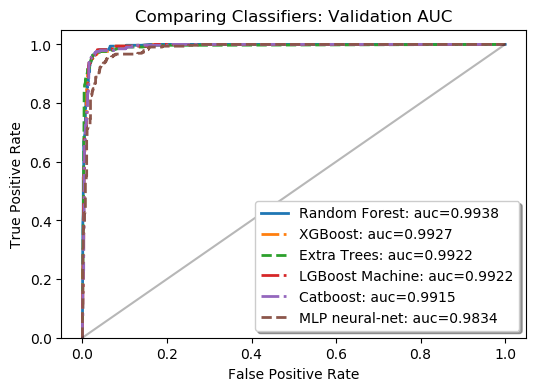

In [44]:
exec(open('/Users/danielfurman/Data_science_code/ML_sdms_predict.py').read())

# Now that we have trained and tuned our ML models, we are ready to predict the validation set and examine the ML
# performance. We first print the validation set (20% held out of training) accuracy, as well as the F statistic 
# and the 2x2 confusion matrix for Rforest, XGB, Etrees, Catboost, LGBM, and MLP-net models. We then visualize
# the AUC statistic with the ROC curve. We also examine the results of a blended PyCaret model. 

In [45]:
f_score # F-statistic for the models above, as well as the PyCaret blended model. We find Random Forest is the
# winner in terms of validation AUC and F-stat, as well as with 10-fold Prec. Extra trees performs second best when 
# considering 10-fold CV and validation performance. Both of these models are compatible with the R dismo package,
# and the next step is to copy their hyperparams into R for dismo's geospatial predict: see sdms_2020.R

,RForest,LGBM,Extra Trees,Blended,Catboost,XGBoost,MLP-net
F-statistic :,0.94362,0.94362,0.943452,0.943452,0.941349,0.939079,0.898844
